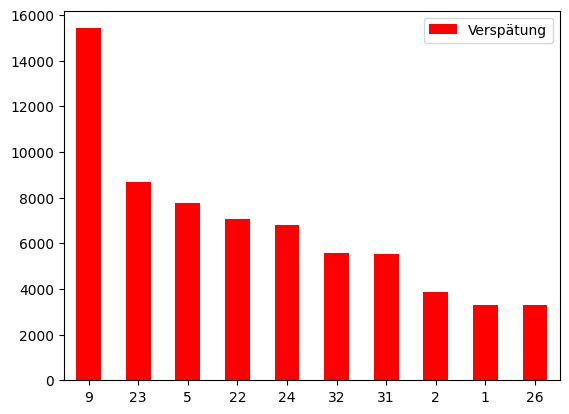

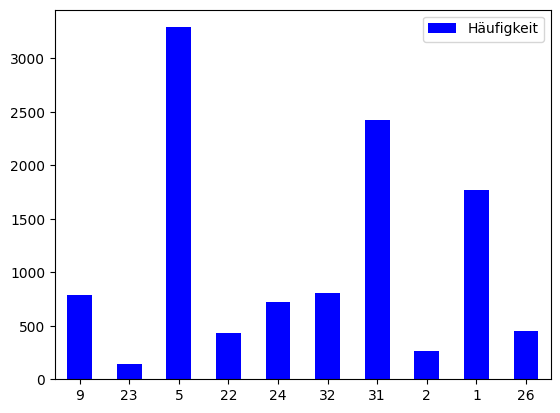

In [5]:
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import pymysql

db = pymysql.connect(host="localhost", user="rnv_importer", password="rnv_importer", database="rnv_big_data_mining")
cursor = db.cursor()
#Liniengruppen mit größter Verspätung (TOP 10)
cursor.execute("SELECT COUNT(*) as anz, `lines`.linegroup, MAX(TIMESTAMPDIFF(SECOND, api_plannedDeparture, api_realtimeDeparture )) AS latency FROM stops INNER JOIN `lines` ON `lines`.id = stops.api_line WHERE (api_plannedDeparture != api_realtimeDeparture) GROUP BY `lines`.linegroup ORDER BY latency DESC LIMIT 10")
latencyPerLine = cursor.fetchall()

# put in lists for chart
anz = []
linegroup = []
latency = []

for record in latencyPerLine:
    anz.append(record[0])
    linegroup.append(record[1])
    latency.append(record[2])

#linechart: largest latency     
df = pd.DataFrame({'Verspätung': latency}, index=linegroup)
ax = df.plot.bar(rot=0, color="red")

#linechart: how many times the is late
df = pd.DataFrame({'Häufigkeit': anz}, index=linegroup)
ax = df.plot.bar(rot=0, color="blue")


